# Módulo 01 -  Analisando Dados da Saúde com Python e Pandas

## Aula 01 - Aquisição e Leitura de Dados Reais

In [1]:
# importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# carregando algumas opções

pd.options.display.float_format = '{:.2f}'.format

In [2]:
# carregando os dados

raw_data_process = pd.read_csv('../data/datasus_processamento.csv',
                       sep = ';',
                       encoding = 'ISO-8859-1', 
                       skiprows = 3,
                       skipfooter = 12,
                       thousands = '.',
                       decimal = ',',
                       engine = 'python')

In [3]:
raw_data_process.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,328876965.09
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4705309002.29


In [4]:
raw_data_process['2008/Ago'].mean()

27800320.306666665

In [5]:
# cópia dos dados originais para garantir que eles não sejam sobrescritos
processamento = raw_data_process.copy()

# remove os números dos nomes das unidades da federação
processamento['Unidade da Federação'] = processamento['Unidade da Federação'].str[3:]

processamento.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,328876965.09
4,Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4705309002.29


Aqui irei adicionar uma coluna extra ao dataframe com as siglas de cada UF. Isso nos auxiliará na visualização de gráficos.

No livro _"Storytelling With Data"_, quase uma bíblia para a visualização de dados, é recomendado não deixar as "labels" dos eixos na diagonal, pois isso dificulta a leitura das informações. [Aqui](https://www.storytellingwithdata.com/blog/2020/4/22/alternatives-to-diagonal-axis-labels) são apresentadas algumas alternativas para resolvermos isso. Por isso escolhi utilizar as siglas de cada UF nos gráficos que precisarem disso.

In [6]:
siglas = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA',
          'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

processamento['UF'] = siglas

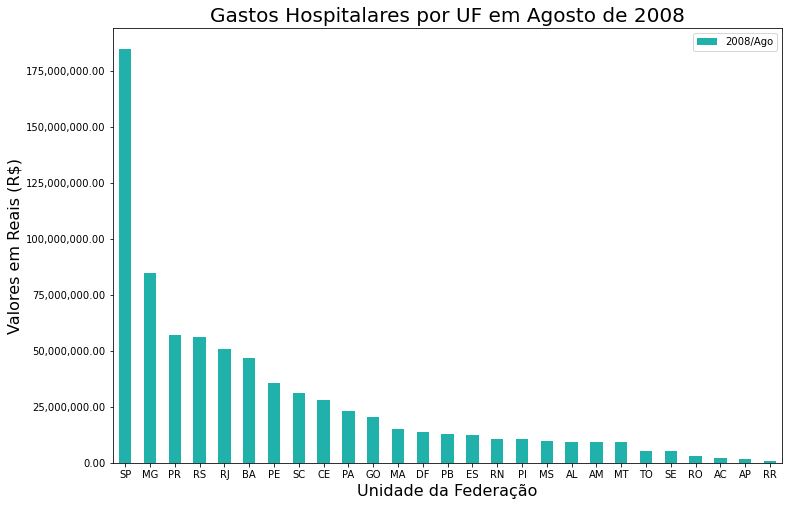

In [7]:
ax = processamento.sort_values(by = '2008/Ago', ascending = False).plot(x = 'UF',
                                                                        y = '2008/Ago',
                                                                        kind = 'bar',
                                                                        figsize = (12, 8),
                                                                        color = 'lightseagreen')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation = 0)

plt.title('Gastos Hospitalares por UF em Agosto de 2008', fontsize = 20)
plt.xlabel('Unidade da Federação', fontsize = 16)
plt.ylabel('Valores em Reais (R$)', fontsize = 16)

plt.show()

Qual o mês mais recente?

In [8]:
# vamos pegar os nomes das 5 últimas colunas
processamento.columns[-3:]

Index(['2021/Mar', 'Total', 'UF'], dtype='object')

Com isso, vemos que o mês mais recente é "Março de 2021".

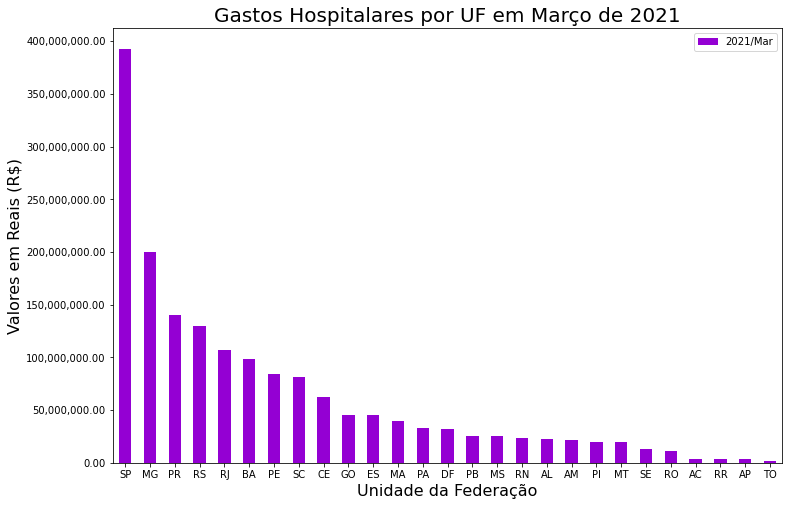

In [9]:
ax = processamento.sort_values(by = '2021/Mar', ascending = False).plot(x = 'UF', 
                                                                        y = '2021/Mar',
                                                                        kind = 'bar',
                                                                        figsize = (12, 8),
                                                                        color = 'darkviolet')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation = 0)

plt.title('Gastos Hospitalares por UF em Março de 2021', fontsize = 20)
plt.xlabel('Unidade da Federação', fontsize = 16)
plt.ylabel('Valores em Reais (R$)', fontsize = 16)

plt.show()

Logo de imediato percebemos que o gasto hospitalar aumentou bastante de 2008 pra 2021. A conclusão mais óbvia que podemos fazer é "Covid-19", mas para termos certeza devemos analisar o crescimento dos gastos ao longo dos meses para vermos alguma tendência de crescimento.

Uma outra observação que podemos fazer é que as Unidades da Federação estão ordenadas no dataframe por suas respectivas regiões. Usaremos esse fato futuramente para algumas análises.

O que aprendemos nessa aula:
- Como utilizar o Tabnet para buscar dados da saúde Brasileira;
- Como utilizar o google Colaboratory;
- Como ler um arquivo CSV com Pandas;
- Como ler um arquivo CSV com caracteres especiais do idioma português;
- Como ignorar o cabeçalho de um arquivo CSV;
- O que são DataFrame;
- Os desafios de ler um arquivo do mundo real;
- Como formatar a impressão dos dados de um DataFrame Pandas;
- Como plotar um gráfico com o Pandas;
- Como formatar a sua visualização;
- Como alterar os ticks do seu gráfico utilizando o Matplotlib.

## Aula 02 - Primeiras Visualizações de Dados

As bibliotecas já estão carregadas no início do notebook.

In [10]:
# carregando os dados

raw_data_atendimento = pd.read_csv('../data/datasus_atendimento.csv',
                       sep = ';',
                       encoding = 'ISO-8859-1', 
                       skiprows = 3,
                       skipfooter = 12,
                       thousands = '.',
                       decimal = ',',
                       engine = 'python')

In [11]:
raw_data_atendimento.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [12]:
# cópia dos dados originais para garantir que eles não sejam sobrescritos
atendimento = raw_data_atendimento.copy()

# remove os números dos nomes das unidades da federação
atendimento['Unidade da Federação'] = atendimento['Unidade da Federação'].str[3:]

atendimento.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [13]:
atendimento.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

In [14]:
colunas_usaveis = atendimento.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')

In [15]:
usaveis = atendimento[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [16]:
usaveis = usaveis.set_index('Unidade da Federação')

In [17]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


Após realizarmos essa operação de ```.set_index()``` é adicionada uma noma linha ao dataframe. [Aqui](https://stackoverflow.com/questions/43191342/pandas-set-index-creates-undesired-new-row-how-do-i-just-do-the-obvious-thing) vemos um solução pra isso.

In [18]:
usaveis.index.name = None
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [19]:
usaveis.T.tail()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2020/Dez,9003402.23,3711660.71,21546059.48,3125021.90,36914437.92,2826612.42,689383.43,30927070.93,19352220.14,50271552.33,...,40500910.57,90567351.87,326846228.95,122146256.92,72720675.11,116833971.73,21387005.58,18852854.81,37614253.55,22552034.04
2021/Jan,8414690.60,3005561.16,24439059.57,3209323.68,33887773.65,2513766.36,347626.85,26797697.76,18437275.64,43743425.74,...,33767261.13,87201907.99,324115425.70,106948897.53,57281832.19,102317646.36,16027788.65,15890528.31,35655886.73,22573869.50
2021/Fev,6039419.59,2272733.90,13679358.06,3044798.77,23343222.94,1534733.18,416534.32,23260245.95,13636005.36,30186951.00,...,25669612.63,60873103.08,268193064.06,83130175.37,47429335.91,84404640.00,11428462.42,13207979.82,32253788.65,19004029.87
2021/Mar,4732441.04,1137341.65,6799060.80,2381844.31,13069564.31,989155.40,928756.84,17294509.11,9542151.53,17173151.55,...,15606368.11,49149884.48,177408317.71,43480729.07,19375822.56,37798832.80,4035989.77,8835890.09,24867001.02,14731938.43
Total,996411254.68,450048530.47,1917247936.05,328876965.09,4705309002.29,309860092.59,1020028272.64,3871069498.04,2280888802.74,6591836650.18,...,3405850698.58,10337389922.09,41396408548.81,14681514706.67,7835011163.40,12764391179.92,2324525096.33,2180119781.15,4973572261.43,2592422853.56


In [20]:
usaveis = usaveis.drop(['Total'], axis = 1)

<AxesSubplot:>

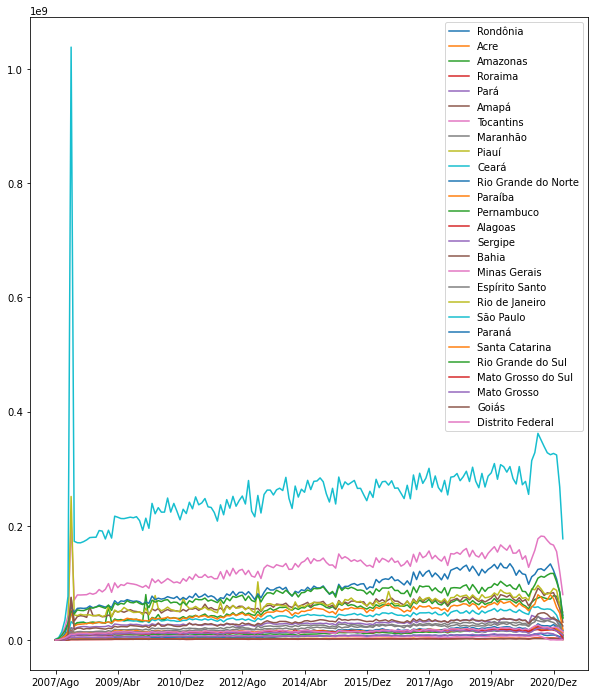

In [21]:
usaveis.T.plot(figsize = (10, 12))

Esse pico no início do gráfico não está nada bonito. Creio que o motivo dele existir é que, como os dados só começaram a serem totalmente contabilizados a partir de Agosto de 2007, os dados anteriores a esse período podem ter sido adicionados à base de dados juntamente com os dados de 2007, e com isso criando esse pico. Para que esses dados não obfusquem nossa visualização, iremos removê-los e contar os anos apenas após 2008.

In [22]:
usaveis = usaveis.drop(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez'], axis = 1)

<AxesSubplot:>

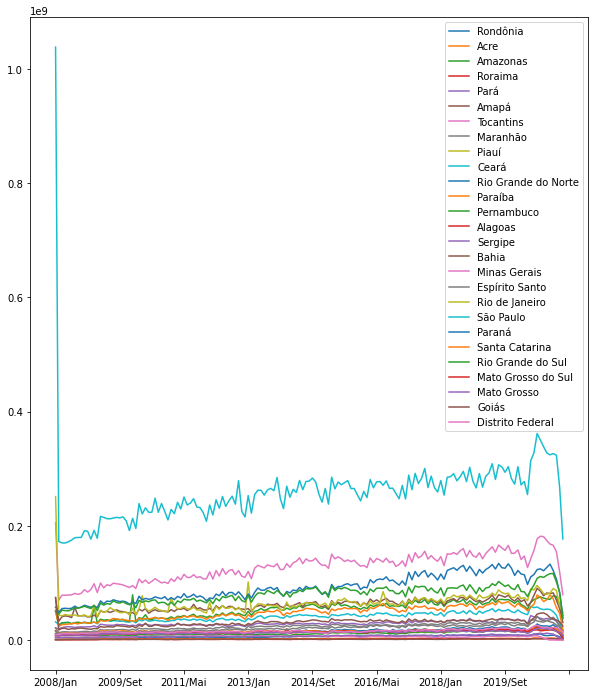

In [23]:
usaveis.T.plot(figsize = (10, 12))

Opa! Removemos todo o ano de 2007 e parece que ainda restou um mês com valores altos, janeiro de 2008. Uma hipótese pra isso é que os dados de cada mês na verdade aparecem no mês seguinte, então janeiro de 2008 pode estar representando dezembro de 2007 (estamos apenas especulando).

In [24]:
# removendo janeiro de 2008
usaveis = usaveis.drop('2008/Jan', axis = 1)

<AxesSubplot:>

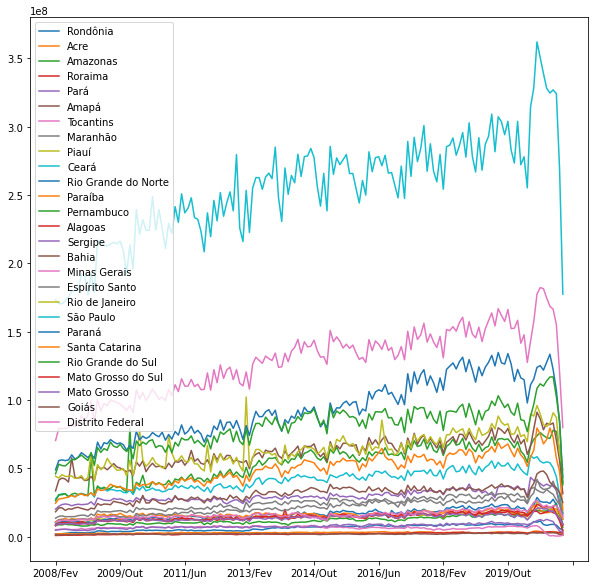

In [25]:
usaveis.T.plot(figsize = (10, 10))

Aparentemente já temos um gráfico com valores mais comparáveis, e um notável aumento de atendimentos no ano de 2020, reforçando nossa hipótese da "Covid-19".

Vamos melhorar esse gráfico.

In [26]:
usaveis.index

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object')

Vemos que as UFs estão ordenadas por região. Vamos usar isso a nosso favor.

In [31]:
norte = usaveis.index[:7]
nordeste = usaveis.index[8:16]
# continua . . .

Index(['Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco',
       'Alagoas', 'Sergipe', 'Bahia'],
      dtype='object')